In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of emotion categories
emotions = ["angry", "basic_tts", "calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised"]

# List of gender-intensity combinations
gender = ["female", "male"]

# List of gender-intensity combinations
intensity = ["normal", "intense"]

# List of categories including mean
categories = ["Comprehensibility", "Emotion precision", "Disturbing artifacts", "Naturalness", "General speech quality", "Category Mean"]

# Read CSV files into DataFrames
mean_df = pd.read_csv("Rate the emotional TTS quality (Antworten) - Means.csv", thousands='.', decimal=',')
std_dev_df = pd.read_csv("Rate the emotional TTS quality (Antworten) - Standard Deviation.csv", thousands='.', decimal=',')
min_df = pd.read_csv("Rate the emotional TTS quality (Antworten) - Min.csv", thousands='.', decimal=',')
max_df = pd.read_csv("Rate the emotional TTS quality (Antworten) - Max.csv", thousands='.', decimal=',')

# Combine all DataFrames into one
all_data = {"Mean": mean_df, "Std Dev": std_dev_df, "Min": min_df, "Max": max_df}
metrics = all_data.keys()

# Drop the column "Unnamed: 6" from each DataFrame
for key in all_data.keys():
    if 'Unnamed: 6' in all_data[key].columns:
        all_data[key].drop('Unnamed: 6', axis=1, inplace=True)

# Keep only rows up to and including index 30
for key in all_data.keys():
    all_data[key] = all_data[key].iloc[:31, :]

In [2]:
%matplotlib inline
mean_df

,Filename,Comprehensibility,Emotion precision,Disturbing artifacts,Naturalness,General speech quality,Category Mean
0,angry__female.wav,3.923077,1.538462,3.923077,2.615385,3.615385,3.123077
1,angry__male.wav,4.615385,3.538462,4.076923,3.615385,4.384615,4.046154
2,angry_strongIntensity__female.wav,4.230769,4.230769,2.846154,3.384615,3.538462,3.646154
3,angry_strongIntensity__male.wav,4.384615,4.076923,3.153846,4.000000,3.923077,3.907692
4,basicTTS.wav,2.384615,1.153846,1.461538,0.153846,1.692308,1.369231
5,calm__female.wav,3.923077,2.384615,3.538462,2.692308,3.692308,3.246154
6,calm__male.wav,2.000000,1.384615,1.153846,1.230769,1.692308,1.492308
7,calm_strongIntensity__female.wav,4.307692,3.307692,4.076923,3.692308,4.230769,3.923077
8,calm_strongIntensity__male.wav,3.615385,1.769231,2.461538,1.692308,2.461538,2.400000
9,disgust__female.wav,4.000000,3.307692,3.769231,3.615385,4.153846,3.769231


In [3]:
index = pd.MultiIndex.from_product([emotions, gender, intensity], names=['Emotion', 'Gender', 'Intensity'])
columns = pd.MultiIndex.from_product([categories, metrics], names=['Category', 'Metric'])

result_df = pd.DataFrame(index=index, columns=columns)

result_df.drop(index=[('basic_tts', 'female', 'normal')], inplace=True)
result_df.drop(index=[('basic_tts', 'male', 'intense')], inplace=True)
result_df.drop(index=[('basic_tts', 'female', 'intense')], inplace=True)

result_df.drop(index=[('neutral', 'female', 'intense')], inplace=True)
result_df.drop(index=[('neutral', 'male', 'intense')], inplace=True)

In [4]:
result_df

Category                   Comprehensibility                    \
Metric                                  Mean Std Dev  Min  Max   
Emotion   Gender Intensity                                       
angry     female normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
          male   normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
basic_tts male   normal                  NaN     NaN  NaN  NaN   
calm      female normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
          male   normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
disgust   female normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
          male   normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
fearful   female normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
          male   normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
happy     female normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
          male   normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
neutral   female normal                  NaN     NaN  NaN  NaN   
          male   normal                  NaN     NaN  NaN  NaN   
sad       female normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
          male   normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
surprised female normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
          male   normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   

Category                   Emotion precision                    \
Metric                                  Mean Std Dev  Min  Max   
Emotion   Gender Intensity                                       
angry     female normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
          male   normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
basic_tts male   normal                  NaN     NaN  NaN  NaN   
calm      female normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
          male   normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
disgust   female normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
          male   normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
fearful   female normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
          male   normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
happy     female normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
          male   normal                  NaN     NaN  NaN  NaN   
                 intense                 NaN     NaN  NaN  NaN   
neutral   female normal                  NaN     NaN  NaN  NaN   
          male   normal                  NaN     NaN  NaN  NaN   
sad       female normal                

In [5]:
print(result_df.info())
print(result_df.index)

print(all_data["Mean"].info())
print(all_data["Mean"].index)


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 31 entries, ('angry', 'female', 'normal') to ('surprised', 'male', 'intense')
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   (Comprehensibility, Mean)          0 non-null      object
 1   (Comprehensibility, Std Dev)       0 non-null      object
 2   (Comprehensibility, Min)           0 non-null      object
 3   (Comprehensibility, Max)           0 non-null      object
 4   (Emotion precision, Mean)          0 non-null      object
 5   (Emotion precision, Std Dev)       0 non-null      object
 6   (Emotion precision, Min)           0 non-null      object
 7   (Emotion precision, Max)           0 non-null      object
 8   (Disturbing artifacts, Mean)       0 non-null      object
 9   (Disturbing artifacts, Std Dev)    0 non-null      object
 10  (Disturbing artifacts, Min)        0 non-null      object
 11  (Disturbing art

In [6]:
for metric in metrics:
    for category in categories:
        for emotion in emotions:
            for g in gender:
                for i in intensity:
                    #print(f"ROW SELECTION: Metirc: {metric}, Category: {category}, Emotion: {emotion}, Gender: {g}, Intensity: {i}")
                    filename_part = "" if i == "normal" else "_strongIntensity"
                    substring_to_find = f"{emotion}{filename_part}__{g}.wav"
                    if emotion == "basic_tts":
                        substring_to_find = "basicTTS.wav" 
                    if emotion == "fearful" and i == "normal":
                        substring_to_find = f"{emotion}{filename_part}_{g}.wav"
                    filtered_rows = all_data[metric][all_data[metric]['Filename'].str.contains(substring_to_find)]
                    if not filtered_rows.empty:
                        result_df.loc[(emotion, g, i), (category, metric)] = filtered_rows[category].values[0]


/var/folders/32/n1d54y1j6db26j5w_wl4tr3w0000gn/T/ipykernel_89325/1868620611.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  result_df.loc[(emotion, g, i), (category, metric)] = filtered_rows[category].values[0]
/var/folders/32/n1d54y1j6db26j5w_wl4tr3w0000gn/T/ipykernel_89325/1868620611.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  result_df.loc[(emotion, g, i), (category, metric)] = filtered_rows[category].values[0]
/var/folders/32/n1d54y1j6db26j5w_wl4tr3w0000gn/T/ipykernel_89325/1868620611.py:15: PerformanceWarning: indexing past lexsort depth may impact performance.
  result_df.loc[(emotion, g, i), (category, metric)] = filtered_rows[category].values[0]


In [7]:
result_df

Category                   Comprehensibility                      \
Metric                                  Mean   Std Dev  Min  Max   
Emotion   Gender Intensity                                         
angry     female normal             3.923077  1.187542  1.0  5.0   
                 intense            4.230769  0.926809  2.0  5.0   
          male   normal             4.615385   0.50637  4.0  5.0   
                 intense            4.384615  0.767948  3.0  5.0   
basic_tts male   normal             2.384615  1.502135  1.0  5.0   
calm      female normal             3.923077  1.037749  2.0  5.0   
                 intense            4.307692  1.031553  2.0  5.0   
          male   normal                  2.0       1.0  1.0  4.0   
                 intense            3.615385  1.120897  1.0  5.0   
disgust   female normal                  4.0  0.912871  2.0  5.0   
                 intense            4.076923  0.954074  2.0  5.0   
          male   normal             2.461538  0.967418  1.0  4.0   
                 intense            3.615385  1.120897  1.0  5.0   
fearful   female normal             4.461538   0.77625  3.0  5.0   
                 intense            4.307692  0.947331  2.0  5.0   
          male   normal             2.538462  1.330124  1.0  5.0   
                 intense            3.769231  1.165751  1.0  5.0   
happy     female normal             4.307692  0.947331  2.0  5.0   
                 intense            4.076923  1.115164  1.0  5.0   
          male   normal             1.692308    1.1094  0.0  4.0   
                 intense            4.307692  0.947331  2.0  5.0   
neutral   female normal             4.615385   0.50637  4.0  5.0   
          male   normal             2.153846  1.068188  0.0  4.0   
sad       female normal             4.153846  0.987096  2.0  5.0   
                 intense            4.615385  0.767948  3.0  5.0   
          male   normal             4.461538   0.77625  3.0  5.0   
                 intense            4.230769  1.165751  2.0  5.0   
surprised female normal             4.153846  1.068188  2.0  5.0   
                 intense            2.538462  1.265924  0.0  5.0   
          male   normal             4.230769  1.012739  2.0  5.0   
                 intense            4.153846  0.987096  2.0  5.0   
basic_tts female normal             2.384615  1.502135  1.0  5.0   
                 intense            2.384615  1.502135  1.0  5.0   
          male   intense            2.384615  1.502135  1.0  5.0   

Category                   Emotion precision                      \
Metric                                  Mean   Std Dev  Min  Max   
Emotion   Gender Intensity                                         
angry     female normal             1.538462  1.506397  0.0  4.0   
                 intense            4.230769  0.599145  3.0  5.0   
          male   normal             3.538462  1.198289  1.0  5.0   
                 intense            4.076923  0.954074  2.0  5.0   
basic_tts male   normal             1.153846  1.214232  0.0  3.0   
calm      female normal             2.384615   1.38675  0.0  5.0   
                 intense            3.307692  1.493576  0.0  5.0   
          male   normal             1.384615   1.38675  0.0  5.0   
                 intense            1.769231  1.235168  0.0  4.0   
disgust   female normal             3.307692  1.493576  0.0  5.0   
                 intense            1.615385  1.325296  0.0  4.0   
          male   normal             0.846154  0.987096  0.0  3.0   
                 intense            2.615385  1.660244  0.0  5.0   
fearful   female normal             3.769231  1.786703  0.0  5.0   
                 intense                 4.0       1.0  2.0  5.0   
          male   normal             1.846154  1.463224  0.0  4.0   
                 intense            2.307692  1.652504  0.0  5.0   
happy     female normal             1.461538  1.391365  0.0  5.0   
                 intense            1.461538  1.450022 

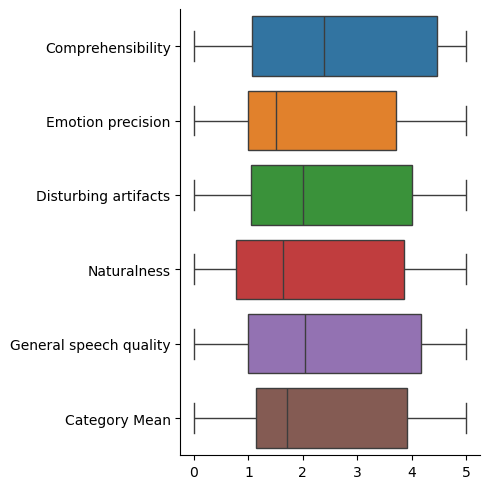

In [8]:
#sns.catplot(data=result_df, x="Emotion", y="Mean", hue="Mean", kind="box")
sns.catplot(data=result_df, kind="box", orient="h")

In [9]:
result_df["Category Mean"]

Metric                          Mean   Std Dev  Min  Max
Emotion   Gender Intensity                              
angry     female normal     3.123077  1.318762  0.8  4.8
                 intense    3.646154  1.009835  1.8  5.0
          male   normal     4.046154   0.95056  2.0  5.0
                 intense    3.907692  1.049821  1.8  5.0
basic_tts male   normal     1.369231  1.229478  0.2  3.8
calm      female normal     3.246154  1.090683  1.2  4.8
                 intense    3.923077  1.275963  1.4  5.0
          male   normal     1.492308  1.046864  0.4  3.8
                 intense         2.4  1.152602  0.4  4.2
disgust   female normal     3.769231  1.257008  0.8  5.0
                 intense    3.415385  1.021499  1.4  4.8
          male   normal     1.538462  0.902239  0.4  3.2
                 intense         3.0  1.380563  0.4  5.0
fearful   female normal     4.276923  1.009831  2.0  5.0
                 intense         4.0  0.995777  2.0  5.0
          male   normal     1.953846  1.400998  0.4  4.6
                 intense    2.984615  1.410402  0.6  5.0
happy     female normal     3.384615  1.141002  1.4  5.0
                 intense         3.2  1.387403  0.6  4.8
          male   normal     1.523077  1.099301  0.2  3.6
                 intense    2.907692   1.20244  0.8  4.6
neutral   female normal     4.246154   0.95146  2.4  5.0
          male   normal     1.615385    1.0889  0.0  4.0
sad       female normal     4.153846  1.038029  1.8  5.0
                 intense    4.153846  0.973032  2.0  5.0
          male   normal     3.723077  1.106129  1.6  5.0
                 intense    3.707692  1.499013  0.6  5.0
surprised female normal     3.769231  1.246699  1.2  5.0
                 intense    2.169231  1.463835  0.2  5.0
          male   normal     3.338462  1.186471  1.2  4.8
                 intense    3.569231  1.324771  1.0  5.0
basic_tts female normal     1.369231  1.229478  0.2  3.8
                 intense    1.369231  1.229478  0.2  3.8
          male   intense    1.369231  1.229478  0.2  3.8

In [35]:
#mean_df = result_df.filter(like='Mean', axis=1)
mean_df = result_df.loc[:, result_df.columns.get_level_values(1) == 'Mean']
std_df = result_df.loc[:, result_df.columns.get_level_values(1) == 'Std Dev']
min_df = result_df.loc[:, result_df.columns.get_level_values(1) == 'Min']
max_df = result_df.loc[:, result_df.columns.get_level_values(1) == 'Max']
mean_df
std_df
min_df
max_df

Category                   Comprehensibility Emotion precision  \
Metric                                   Max               Max   
Emotion   Gender Intensity                                       
angry     female normal                  5.0               4.0   
                 intense                 5.0               5.0   
          male   normal                  5.0               5.0   
                 intense                 5.0               5.0   
basic_tts male   normal                  5.0               3.0   
calm      female normal                  5.0               5.0   
                 intense                 5.0               5.0   
          male   normal                  4.0               5.0   
                 intense                 5.0               4.0   
disgust   female normal                  5.0               5.0   
                 intense                 5.0               4.0   
          male   normal                  4.0               3.0   
                 intense                 5.0               5.0   
fearful   female normal                  5.0               5.0   
                 intense                 5.0               5.0   
          male   normal                  5.0               4.0   
                 intense                 5.0               5.0   
happy     female normal                  5.0               5.0   
                 intense                 5.0               4.0   
          male   normal                  4.0               3.0   
                 intense                 5.0               4.0   
neutral   female normal                  5.0               5.0   
          male   normal                  4.0               5.0   
sad       female normal                  5.0               5.0   
                 intense                 5.0               5.0   
          male   normal                  5.0               5.0   
                 intense                 5.0               5.0   
surprised female normal                  5.0               5.0   
                 intense                 5.0               5.0   
          male   normal                  5.0               5.0   
                 intense                 5.0               5.0   
basic_tts female normal                  5.0               3.0   
                 intense                 5.0               3.0   
          male   intense                 5.0               3.0   

Category                   Disturbing artifacts Naturalness  \
Metric                                      Max         Max   
Emotion   Gender Intensity                                    
angry     female normal                     5.0         5.0   
                 intense                    5.0         5.0   
          male   normal                     5.0         5.0   
                 intense                    5.0         5.0   
basic_tts male   normal                     4.0         2.0   
calm      female normal                     5.0         4.0   
                 intense                    5.0         5.0   
          male   normal                     4.0         2.0   
                 intense                    4.0         4.0   
disgust   female normal                     5.0         5.0   
                 intense                    5.0         5.0   
          male   normal                     3.0         2.0   
                 intense                    5.0         5.0   
fearful   female normal                     5.0         5.0   
                 intense                    5.0         5.0   
          male   normal                     5.0         5.0   
                 intense                    5.0         5.0   
happy     female normal                     5.0         5.0   
                 intense                    5.0         5.0   
          male   normal                     4.0         4.0   
                 intense                    5.0         4.0   
neutral   female normal                     5

In [32]:
""" import numpy as np
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
for date in all_data:
    print(date.shape)
    sns.distplot(date, hist=False)  """

' import numpy as np\nall_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]\nfor date in all_data:\n    print(date.shape)\n    sns.distplot(date, hist=False)  '

In [41]:
# Combine the DataFrames into a single DataFrame
combined_df = pd.concat([mean_df, std_df, min_df, max_df], keys=['Mean', 'Std Dev', 'Min', 'Max'], axis=1)
combined_df


Mean                    \
Category                   Comprehensibility Emotion precision   
Metric                                  Mean              Mean   
Emotion   Gender Intensity                                       
angry     female normal             3.923077          1.538462   
                 intense            4.230769          4.230769   
          male   normal             4.615385          3.538462   
                 intense            4.384615          4.076923   
basic_tts male   normal             2.384615          1.153846   
calm      female normal             3.923077          2.384615   
                 intense            4.307692          3.307692   
          male   normal                  2.0          1.384615   
                 intense            3.615385          1.769231   
disgust   female normal                  4.0          3.307692   
                 intense            4.076923          1.615385   
          male   normal             2.461538          0.846154   
                 intense            3.615385          2.615385   
fearful   female normal             4.461538          3.769231   
                 intense            4.307692               4.0   
          male   normal             2.538462          1.846154   
                 intense            3.769231          2.307692   
happy     female normal             4.307692          1.461538   
                 intense            4.076923          1.461538   
          male   normal             1.692308          0.923077   
                 intense            4.307692          1.307692   
neutral   female normal             4.615385          3.692308   
          male   normal             2.153846          1.923077   
sad       female normal             4.153846          4.384615   
                 intense            4.615385          3.307692   
          male   normal             4.461538          2.846154   
                 intense            4.230769          4.153846   
surprised female normal             4.153846          3.307692   
                 intense            2.538462          3.230769   
          male   normal             4.230769          2.692308   
                 intense            4.153846          3.307692   
basic_tts female normal             2.384615          1.153846   
                 intense            2.384615          1.153846   
          male   intense            2.384615          1.153846   

                                                             \
Category                   Disturbing artifacts Naturalness   
Metric                                     Mean        Mean   
Emotion   Gender Intensity                                    
angry     female normal                3.923077    2.615385   
                 intense               2.846154    3.384615   
          male   normal                4.076923    3.615385   
                 intense               3.153846         4.0   
basic_tts male   normal                1.461538    0.153846   
calm      female normal                3.538462    2.692308   
                 intense               4.076923    3.692308   
          male   normal                1.153846    1.230769   
                 intense               2.461538    1.692308   
disgust   female normal                3.769231    3.615385   
                 intense               4.076923    3.384615   
          male   normal                1.076923    1.230769   
                 intense                    3.0    2.692308   
fearful   female normal                4.461538    4.230769   
                 intense               3.692308         4.0   
          male   normal                1.846154    1.538462   
                 intense               3.538462    2.230769   
happy     female normal                4.153846    2.923077   
                 intense               3.769231         3.0   
          male   normal                1.153846    1.615385   
                 in

In [53]:
# Reset the index for better access to columns
#combined_df = combined_df.reset_index()
#combined_df

In [64]:

# Specify the order of categories for better plotting
order = ["angry", "basic_tts", "calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised"]
order = ["fearful",
         "neutral",
         "sad",
         "angry",
         "calm",
         "surprised",
         "disgust",
         "neutral",
         "basic_tts"]
sns.set_theme(style="darkgrid")
sns.set_style("dark")

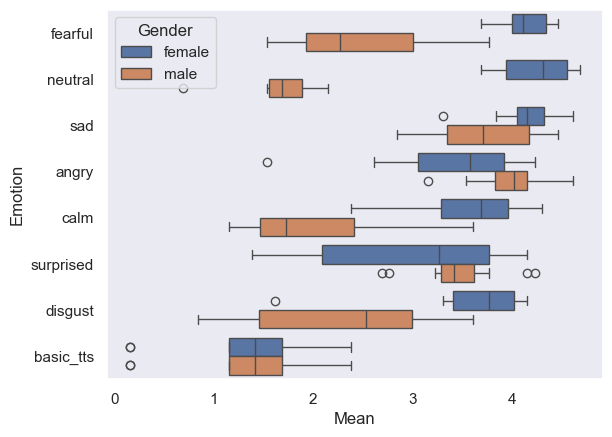

In [65]:
hue_order = ["female", "male"]
# Create a horizontal boxplot using Seaborn
sns.boxplot(x=combined_df['Mean'], y=combined_df['Emotion'], hue=combined_df['Gender'], order=order, orient='h')
plt.show()

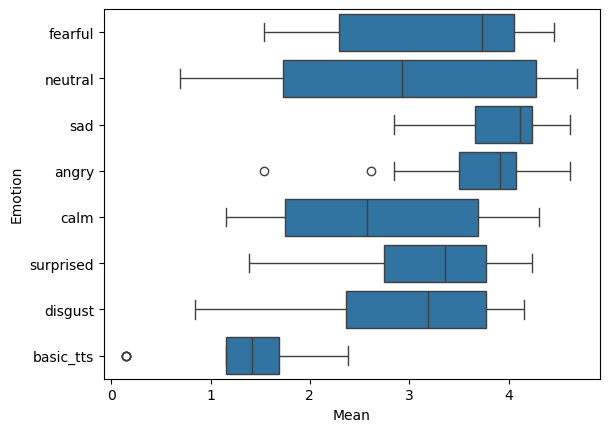

In [61]:
sns.boxplot(x=combined_df['Mean'], y=combined_df['Emotion'], order=order, orient='h')
plt.show()

In [78]:
mean_df

Category                   Comprehensibility Emotion precision  \
Metric                                  Mean              Mean   
Emotion   Gender Intensity                                       
angry     female normal             3.923077          1.538462   
                 intense            4.230769          4.230769   
          male   normal             4.615385          3.538462   
                 intense            4.384615          4.076923   
basic_tts male   normal             2.384615          1.153846   
calm      female normal             3.923077          2.384615   
                 intense            4.307692          3.307692   
          male   normal                  2.0          1.384615   
                 intense            3.615385          1.769231   
disgust   female normal                  4.0          3.307692   
                 intense            4.076923          1.615385   
          male   normal             2.461538          0.846154   
                 intense            3.615385          2.615385   
fearful   female normal             4.461538          3.769231   
                 intense            4.307692               4.0   
          male   normal             2.538462          1.846154   
                 intense            3.769231          2.307692   
happy     female normal             4.307692          1.461538   
                 intense            4.076923          1.461538   
          male   normal             1.692308          0.923077   
                 intense            4.307692          1.307692   
neutral   female normal             4.615385          3.692308   
          male   normal             2.153846          1.923077   
sad       female normal             4.153846          4.384615   
                 intense            4.615385          3.307692   
          male   normal             4.461538          2.846154   
                 intense            4.230769          4.153846   
surprised female normal             4.153846          3.307692   
                 intense            2.538462          3.230769   
          male   normal             4.230769          2.692308   
                 intense            4.153846          3.307692   
basic_tts female normal             2.384615          1.153846   
                 intense            2.384615          1.153846   
          male   intense            2.384615          1.153846   

Category                   Disturbing artifacts Naturalness  \
Metric                                     Mean        Mean   
Emotion   Gender Intensity                                    
angry     female normal                3.923077    2.615385   
                 intense               2.846154    3.384615   
          male   normal                4.076923    3.615385   
                 intense               3.153846         4.0   
basic_tts male   normal                1.461538    0.153846   
calm      female normal                3.538462    2.692308   
                 intense               4.076923    3.692308   
          male   normal                1.153846    1.230769   
                 intense               2.461538    1.692308   
disgust   female normal                3.769231    3.615385   
                 intense               4.076923    3.384615   
          male   normal                1.076923    1.230769   
                 intense                    3.0    2.692308   
fearful   female normal                4.461538    4.230769   
                 intense               3.692308         4.0   
          male   normal                1.846154    1.538462   
                 intense               3.538462    2.230769   
happy     female normal                4.153846    2.923077   
                 intense               3.769231         3.0   
          male   normal                1.153846    1.615385   
                 intense               3.615385    2.230769   
neutral   female normal                4.6923